### Gaussian model of shear frame building with 3 floors

### Observing multiple floors

### General Code - can be used with single floor as well

In [1]:
import numpy as np

import matplotlib.pyplot as plt

## First index is floor number and second is PC coefficient
# First floor
u10 = 0.2
u11 = 0.05
u12 = 0.03


# Second floor
u20 = 0.3
u21 = 0.04
u22 = 0.02


# Third floor
u30 = 0.4
u31 = 0.06
u32 = 0.02



# np.rng(40)

np.random.seed(31)

nsamp =  10000

xi1 = np.random.normal(0,1, nsamp)
xi2 = np.random.normal(0,1, nsamp)

U1 = np.zeros((nsamp,1))
U2 = np.zeros((nsamp,1))
U3 = np.zeros((nsamp,1))


U1[:,0] = u10 + u11 *  xi1 + u12 *  xi2   

U2[:,0] = u20 + u21 *  xi1 + u22 *  xi2  

U3[:,0] = u30 + u31 *  xi1 + u32 *  xi2  


P_k = np.zeros((3,3))

mu1 = np.mean(U1)
var1 = np.var(U1,ddof=1)

mu2 = np.mean(U2)
var2 = np.var(U2,ddof=1)

mu3 = np.mean(U3)
var3 = np.var(U3,ddof=1)


x_k_mean = np.array([[mu1],[mu2],[mu3]])

x_ki = np.array([U1[:,0],U2[:,0],U3[:,0]])

print("x_k_mean is", x_k_mean)

print(x_ki.shape)
# cov12 = np.cov(U1[:,0],U2[:,0])
# cov13 = np.cov(U1[:,0],U3[:,0])
# cov23 = np.cov(U2[:,0],U3[:,0])

# print(cov12)
# print(cov13)
# print(cov23)

data = np.stack((U1[:,0], U2[:,0], U3[:,0]), axis=0)

print(data.shape)

# print(U1[:,0].shape)

P_k = np.cov(data)

print("forecast cov is", P_k)



x_k_mean is [[0.20128869]
 [0.30094267]
 [0.40119332]]
(3, 10000)
(3, 10000)
forecast cov is [[0.00348644 0.00266873 0.00370206]
 [0.00266873 0.00205445 0.00288034]
 [0.00370206 0.00288034 0.00411725]]


H_k is [[1. 0. 0.]
 [0. 1. 0.]]
noise strength is 0.005
epsilon is [[ 2.16493494]
 [-0.99065175]]
perturbation size is (2, 10000)
sample noise covarince is [[4.99283096e-03 3.25852940e-06]
 [3.25852940e-06 4.88771338e-03]]
iteration step
 0
d_k is [[0.3543727 ]
 [0.23089302]]
d_ki is [[0.3862812  0.36411628]
 [0.40141299 0.30278222]
 [0.27138558 0.22350494]
 ...
 [0.3319932  0.35126218]
 [0.45487386 0.31859914]
 [0.32695056 0.05484507]]
Kalman gain is 
 [[0.33006486 0.25738394]
 [0.25205064 0.19892555]
 [0.34807285 0.28093433]]
(3, 10000)
updated mean is [[0.23414138]
 [0.32586482]
 [0.43517652]]
updated covariance is [[0.00162631 0.00124118 0.00171209]
 [0.00124118 0.00095886 0.00135309]
 [0.00171209 0.00135309 0.0019882 ]]
updated covariance check is [[0.0016488  0.00125909 0.00173878]
 [0.00125909 0.00097311 0.00137426]
 [0.00173878 0.00137426 0.00201947]]


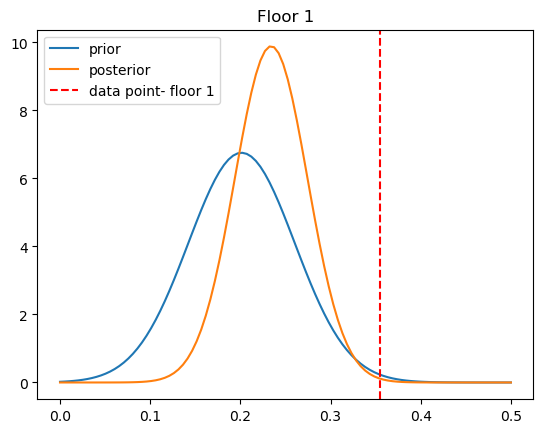

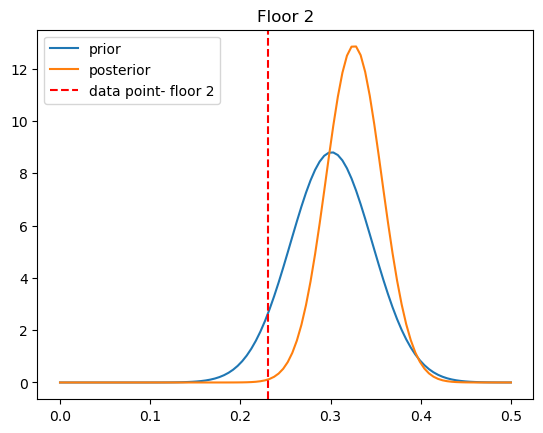

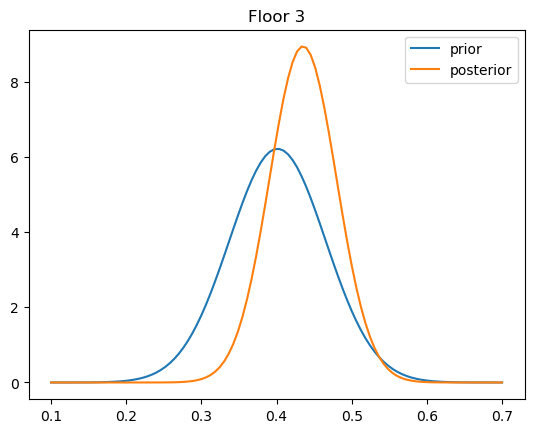

In [2]:
### Ensemble of Data
from scipy.stats import norm

import os

statesize = 3
observed = 2

x1 =  np.linspace(0.0,0.5, 100)

x2 =  np.linspace(0.0,0.5, 100)

x3 =  np.linspace(0.1,0.7, 100)



p1 = norm.pdf(x1, loc= mu1, scale = np.sqrt(P_k[0,0]))
p2 = norm.pdf(x2, loc= mu2, scale = np.sqrt(P_k[1,1]))
p3 = norm.pdf(x3, loc= mu3, scale = np.sqrt(P_k[2,2]))


# p101 = norm.pdf(x1, loc= mu1 + 3 * np.sqrt(P_k[0,0]), scale =  np.sqrt(P_k[0,0]))

# p102 = norm.pdf(x1, loc= mu1 - 3 * np.sqrt(P_k[0,0]), scale = np.sqrt(P_k[0,0]))


H_k = np.zeros((observed,statesize))

if(observed == 1): 
    H_k[0,0] = 1
elif (observed == 2):
    H_k[0,0] = 1
    H_k[1,1] = 1
else:
    H_k[0,0] = 1
    H_k[1,1] = 1
    H_k[2,2] = 1

print("H_k is",H_k)


np.random.seed(106)
# Noise strength
# Noise strength
Gamma = 0.005

print("noise strength is",Gamma)

nsteps = 1

## Generate independent samples noise for floors

# epsilon = np.random.normal(0,np.sqrt(Gamma),size=(observed,nsteps))

epsilon = np.random.normal(0,1,size=(observed,nsteps))

print("epsilon is", epsilon)


# perturbed samples
e = np.random.normal(0,1,size=(observed,nsamp))

print("perturbation size is", e.shape)

e = np.sqrt(Gamma) * e

gamma_sample = np.cov(e)

print("sample noise covarince is",gamma_sample)


d_ki =  np.zeros((nsamp,observed))

P_a = np.zeros((statesize,statesize))


for i in range(0,nsteps):


    print("iteration step\n",i)

    # Generating true data
    d_k = H_k @ x_k_mean + np.sqrt(Gamma) * epsilon[:,i].reshape(observed,1)

    print("d_k is", d_k)


    for i in range(nsamp):
        d_ki[i,:] = (d_k + e[:,i].reshape(observed,1)).reshape(observed)


    print("d_ki is", d_ki)


    K_g = P_k @ H_k.T @ np.linalg.inv(H_k @ P_k @ H_k.T + gamma_sample)


    print("Kalman gain is \n", K_g)

    ### Update state using samples

    x_ai = np.zeros((statesize,nsamp))

    for i in range(nsamp):
        sample = x_ki[:,i].reshape(statesize,1) + K_g @ (d_ki[i,:].reshape(observed,1) - H_k @ x_ki[:,i].reshape(statesize,1))
        x_ai[:,i] = sample.reshape(3)


    ### updated sample means and cov

    print(x_ai.shape)

    x_a_mean = np.mean(x_ai, axis=1)

    x_a_mean = x_a_mean.reshape(statesize,1)

    print("updated mean is", x_a_mean)

    # for i in range(nsamp):
    #     P_a = P_a + (x_ai[:,i].reshape(statesize,1) - x_a_mean) @ (x_ai[:,i].reshape(statesize,1) - x_a_mean).T

    # P_a = P_a/ (nsamp - 1)

    P_a = np.cov(x_ai)

    P_a_check = (np.identity(statesize) - K_g @ H_k) @ P_k

    print("updated covariance is", P_a)

    print("updated covariance check is", P_a_check)


    p11 = norm.pdf(x1, loc= x_a_mean[0], scale = np.sqrt(P_a[0,0]))
    p22 = norm.pdf(x2, loc= x_a_mean[1], scale = np.sqrt(P_a[1,1]))
    p33 = norm.pdf(x3, loc= x_a_mean[2], scale = np.sqrt(P_a[2,2]))


    plt.figure(i)
    plt.title("Floor 1")
    plt.plot(x1,p1,label = 'prior')
    plt.plot(x1,p11,label = 'posterior')
    plt.axvline(d_k[0], color='red', linestyle='--', label='data point- floor 1')
    plt.legend()
    # plt.savefig('EnKF_floor1-1observed.pdf')
    plt.show()

    plt.figure(i+1)
    plt.title("Floor 2")
    plt.plot(x2,p2,label = 'prior')
    plt.plot(x2,p22,label = 'posterior')
    plt.axvline(d_k[1], color='red', linestyle='--', label='data point- floor 2')
    plt.legend()
    # plt.savefig('EnKF_floor2_1observed.pdf')
    plt.show()

    plt.figure(i+2)
    plt.title("Floor 3")
    plt.plot(x3,p3,label = 'prior')
    plt.plot(x3,p33,label = 'posterior')
    plt.legend()
    # plt.savefig('EnKF_floor3_1observed.pdf')
    plt.show()

    # x_k_mean = x_a_mean
    # P_k = P_a





In [ ]:



# p44 = norm.pdf(x1, loc= x_a_mean[0], scale = np.sqrt(P_a[0,0]))
# p55 = norm.pdf(x2, loc= x_a_mean[1], scale = np.sqrt(P_a[1,1]))
# p66 = norm.pdf(x3, loc= x_a_mean[2], scale = np.sqrt(P_a[2,2]))


### File containing 1 Kalman filter update with 2 floor measurements 

if(observed == 1):
    npzfile = np.load('./../KF/pdf_update_single.npz')
else:
    npzfile_prior = np.load('./../KF/pdf_prior_2data.npz')
    npzfile_posterior = np.load('./../KF/pdf_update_2data.npz')


# print(npzfile['z'])

plt.figure(i)
plt.title("Floor 1")
plt.plot(x1,npzfile_prior['x'],label = 'Kalman-prior')
plt.plot(x1,npzfile_posterior['x'],label = 'Kalman-posterior')
plt.plot(x1,p1,'k--',label = 'EnKF-prior')
plt.plot(x1,p11,'k--',label = 'EnKF-posterior')
plt.axvline(d_k[0], color='red', linestyle='--', label='data point- floor 1')
plt.legend()
plt.savefig('EnKF_floor1_2data.pdf')
plt.show()

plt.figure(i+1)
plt.title("Floor 2")
plt.plot(x2,npzfile_prior['y'],label = 'Kalman-prior')
plt.plot(x2,npzfile_posterior['y'],label = 'Kalman-posterior')
plt.plot(x2,p2,'k--',label = 'EnKF-prior')
plt.plot(x2,p22,'k--',label = 'EnKF-posterior')
plt.axvline(d_k[1], color='red', linestyle='--', label='data point- floor 2')
plt.legend()
plt.savefig('EnKF_floor2_2data.pdf')
plt.show()

plt.figure(i+2)
plt.title("Floor 3")
plt.plot(x3,npzfile_prior['z'],label = 'Kalman-prior')
plt.plot(x3,npzfile_posterior['z'],label = 'Kalman-posterior')
plt.plot(x3,p3,'k--',label = 'EnKF-prior')
plt.plot(x3,p33,'k--',label = 'EnKF-posterior')
plt.legend()
plt.savefig('EnKF_floor3_2data.pdf')
plt.show()



In [ ]:
# [[0.00779874 0.00568688 0.00837751]
#  [0.00568688 0.00420685 0.00627312]
# #  [0.00837751 0.00627312 0.0095587 ]]


# varxy = 0.00779874 * 0.0095587

# covsquare = 0.00837751**2

# print(varxy)



print(mu1 + 3 * np.sqrt(P_k[0,0]))

print(mu1 - 3 * np.sqrt(P_k[0,0]))